### Importing libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### Read Data from Data Set and pre-processing

In [34]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
print(df.shape)
print("\n")
df.dtypes # check data types

(200, 5)




CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
df.isnull().sum() # check for missing/null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### EDA

***Creating Histogram to examine the distribution of values for each feature.***

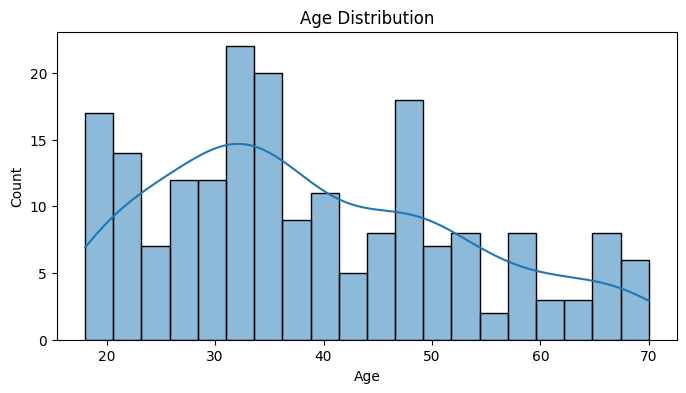

In [39]:
#Age
plt.figure( figsize=(8, 4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

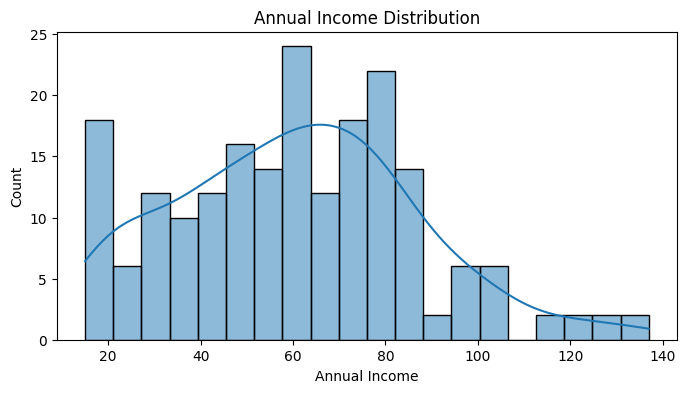

In [40]:
#Annual Income
plt.figure( figsize=(8, 4))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

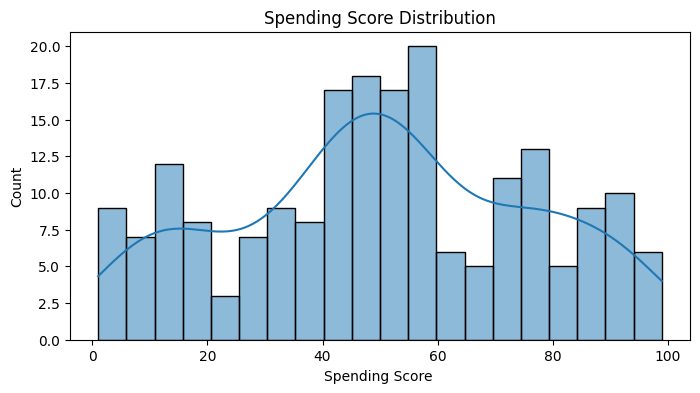

In [41]:
#Spening Score
plt.figure( figsize=(8, 4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score ")
plt.ylabel("Count")
plt.show()

***Creating Boxplot to analyze outliers***

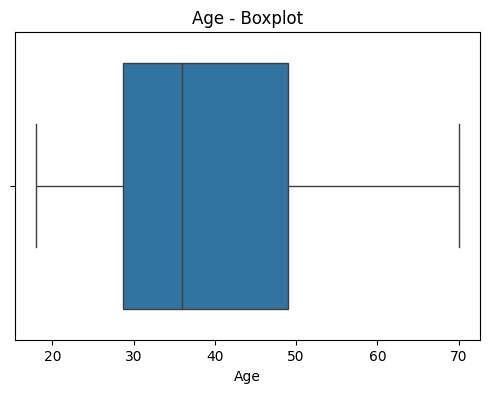

In [42]:
#Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Age"])
plt.title("Age - Boxplot")
plt.show()

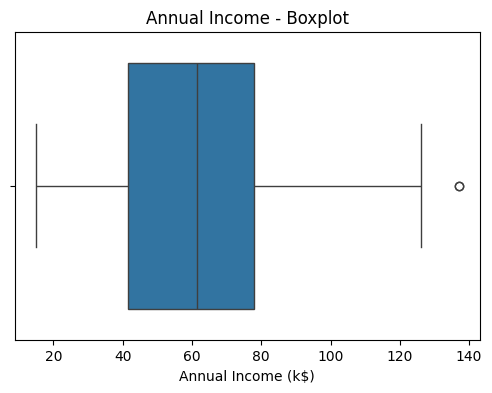

In [43]:
#Annual Income
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Annual Income (k$)"])
plt.title("Annual Income - Boxplot")
plt.show()

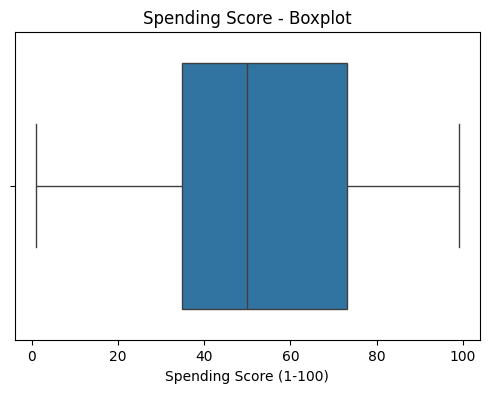

In [44]:
#Spending Score
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Spending Score (1-100)"])
plt.title("Spending Score - Boxplot")
plt.show()

***scatter plot to see whether the clusters are visually distinguishable.***

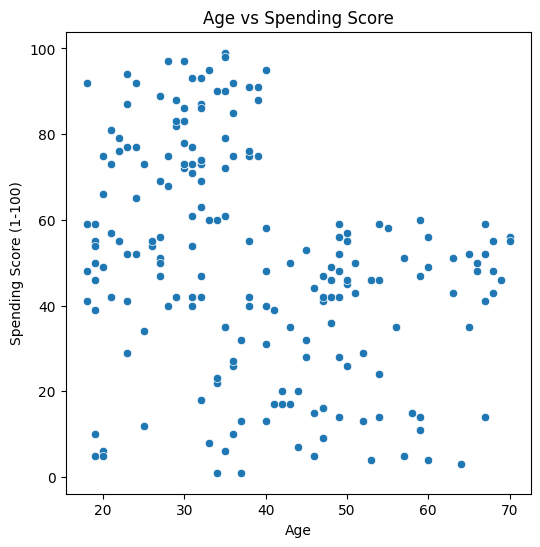

In [45]:
#Age vs Spending Score
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()

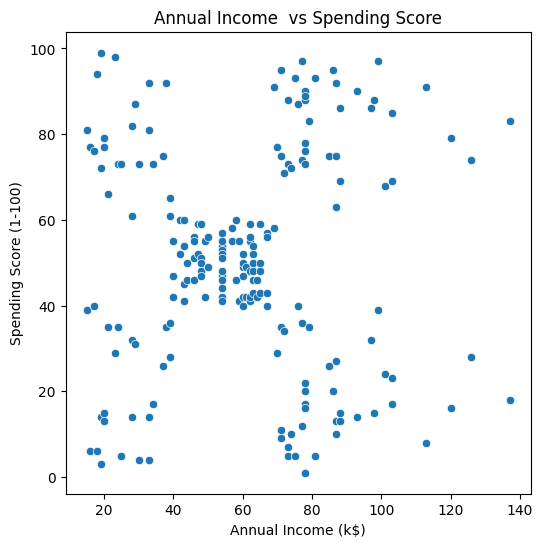

In [46]:
#Annual Income vs Spending Score
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Annual Income  vs Spending Score")
plt.show()

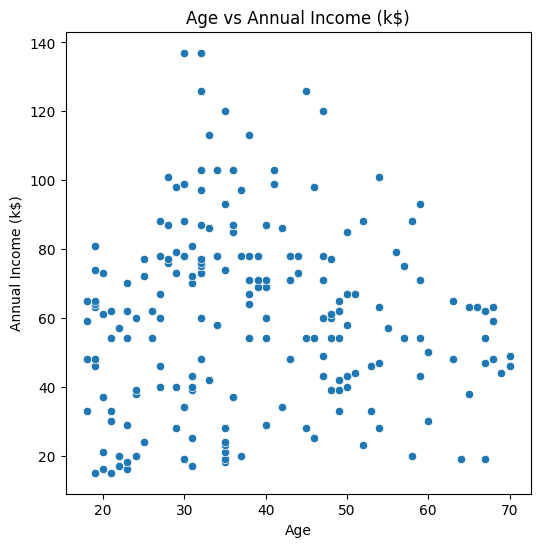

In [47]:
#Age vs Annual Income
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)")
plt.title("Age vs Annual Income (k$)")
plt.show()

***Countplot diagram for Gender***

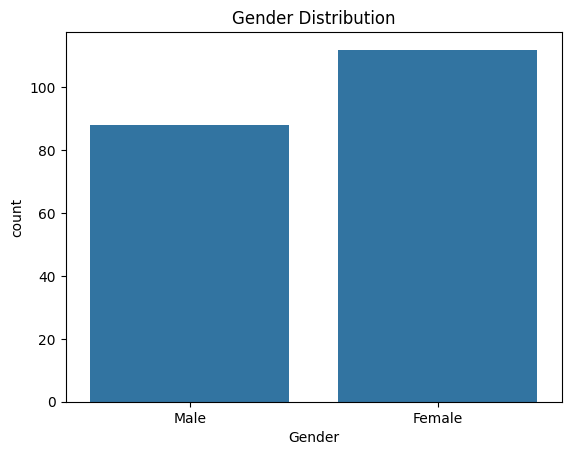

In [48]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

***Relation Between numeric cols***

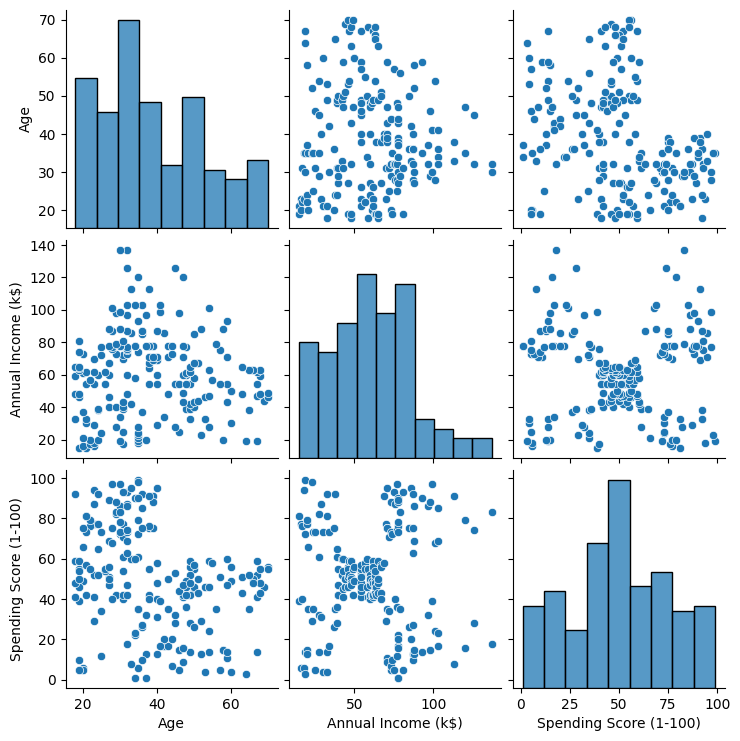

In [49]:
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.show()

### Data Preprocessing(Feature Set)

define feature set X:

In [50]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

***To use Scikit-learn we should convert pandas data frame to a Numpy array***

In [51]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

***Scaling(Normalization)***

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Clustering Algorithms

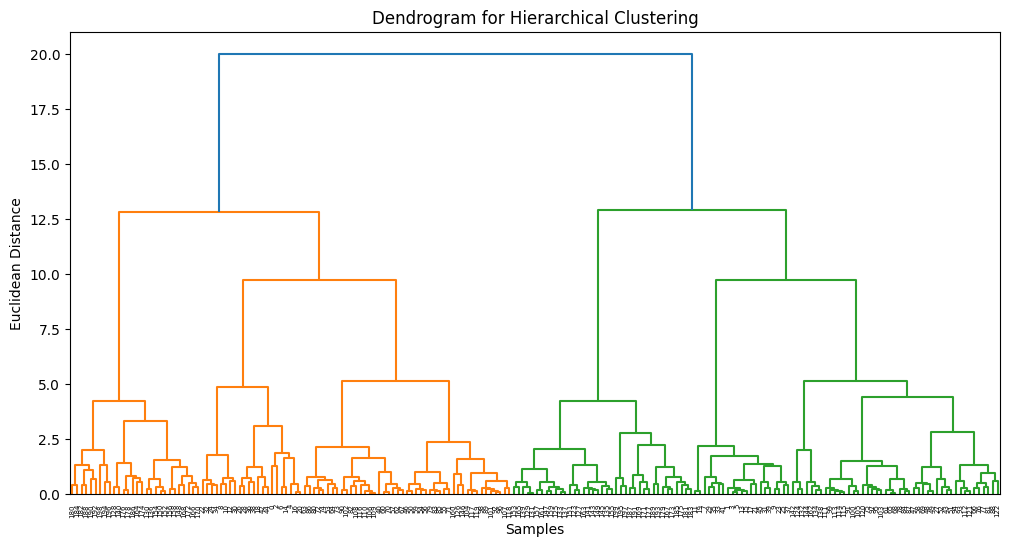

In [53]:
plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method="ward")
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [54]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X_scaled)
df["HC_Cluster"] = cluster_labels

### Cluster Analysis & Visualization

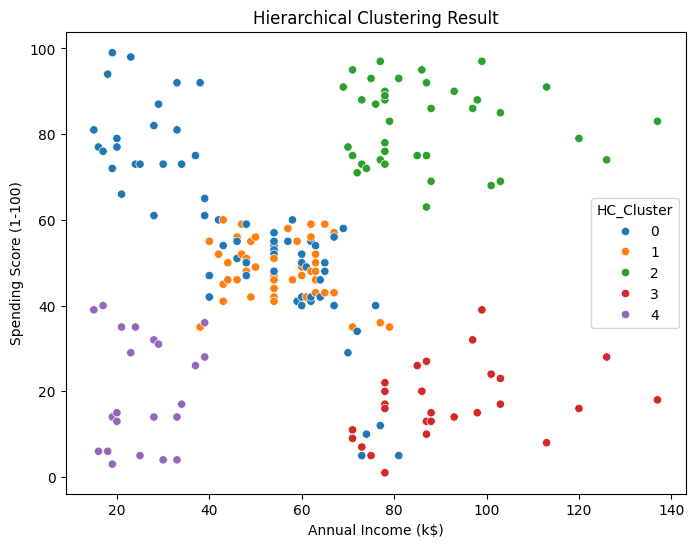

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="HC_Cluster",
    palette="tab10"
)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

***Cluster Profiling***

In [56]:
df.groupby("HC_Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
HC_Cluster,,,
0,26.560606,47.363636,56.787879
1,56.400000,55.288889,48.355556
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571
4,44.318182,25.772727,20.272727


### Interpretation (Hierarchical Clustering)
- Cluster 2 – Luxury Lovers: Mid-aged customers with high income and very high spending. They are likely brand-conscious, status-driven buyers who enjoy premium products and services.
- Cluster 3 – Wealthy Minimalists: High-income individuals with very low spending. Possibly frugal investors or people with a minimalist lifestyle who prefer saving over consumption.
- Cluster 1 – Cautious Seniors: Older customers with moderate income and balanced spending. They are likely stable, risk-averse consumers with predictable purchasing behavior.
- Cluster 0 – Sociable Young Adults: Younger customers with average income and relatively high spending. They may prioritize social life, entertainment, and lifestyle products.
- Cluster 4 – Low Budget Clients: Customers with low income and low spending. Likely to be price-sensitive, budget-conscious individuals or retirees with limited financial flexibility.